Matplotlib
==========

In [41]:
%matplotlib nbagg

In [42]:
import numpy
from silx.image.marchingsquares import MarchingSquaresMergeImpl
from silx.image.marchingsquares._skimage import MarchingSquaresSciKitImage

In [25]:
from matplotlib import pyplot

def imshow_data(image, mask=None, marching_squares=None, value=None, pixels=None, polygons=None):
    import matplotlib
    from matplotlib.patches import Polygon
    from matplotlib.collections import PatchCollection
    
    pixels = marching_squares.find_pixels(value)
    polygons = marching_squares.find_contours(value)

    ax = pyplot.gca()
    ax.set_xmargin(0.1)
    ax.set_ymargin(0.1)
    ax.set_ylim([0, image.shape[0]])
    ax.set_xlim([0, image.shape[1]])
    ax.invert_yaxis()

    # image
    pyplot.imshow(image, cmap="Greys", alpha=.5)

    # mask
    if mask is not None:
        mask = numpy.ma.masked_where(mask == 0, mask)
        pyplot.imshow(mask, cmap="cool", alpha=.5)

    # iso pixels
    
    if pixels is not None and len(pixels) != 0:
        mask_image = numpy.zeros(image.shape, dtype=numpy.int8)
        indexes = pixels[:,0] * image.shape[1] + pixels[:,1]
        mask_image = mask_image.ravel()
        mask_image[indexes] = 1
        mask_image.shape = image.shape
        mask_image = numpy.ma.masked_where(mask_image == 0, mask_image)
        pyplot.imshow(mask_image, cmap="Set1", alpha=.5)

    # iso contours
    if polygons is not None:
        for p in polygons:
            if len(p) == 0:
                continue
            is_closed = numpy.allclose(p[0], p[-1])
            xy = numpy.empty(p.shape)
            xy[:, 0] = p[:, 1]
            xy[:, 1] = p[:, 0]
            p = Polygon(xy, fill=False, edgecolor="black", linestyle="--", closed=is_closed)
            ax.add_patch(p)

def show_data(image, mask=None, marching_squares=None, value=None):
    pyplot.figure()
    imshow_data(image, mask, marching_squares, value)
    pyplot.show()

<IPython.core.display.Javascript object>


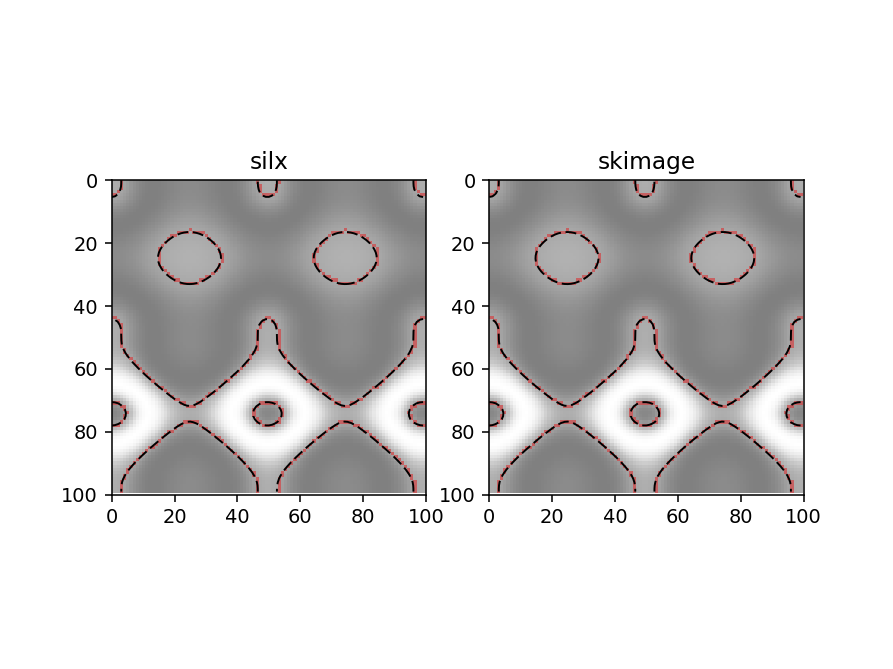

In [28]:
import numpy
x, y = numpy.ogrid[-numpy.pi:numpy.pi:100j, -numpy.pi:numpy.pi:100j]
image = numpy.sin(numpy.exp((numpy.sin(x)**3 + numpy.cos(y)**2)))
mask = None

algo = MarchingSquaresMergeImpl(image, mask)
skalgo = MarchingSquaresSciKitImage(image, mask)

pyplot.figure()
pyplot.subplot("121")
pyplot.title("silx")
imshow_data(image, mask, algo, 0.50)
pyplot.subplot("122")
pyplot.title("skimage")
imshow_data(image, mask, skalgo, 0.50)
pyplot.show()

<IPython.core.display.Javascript object>


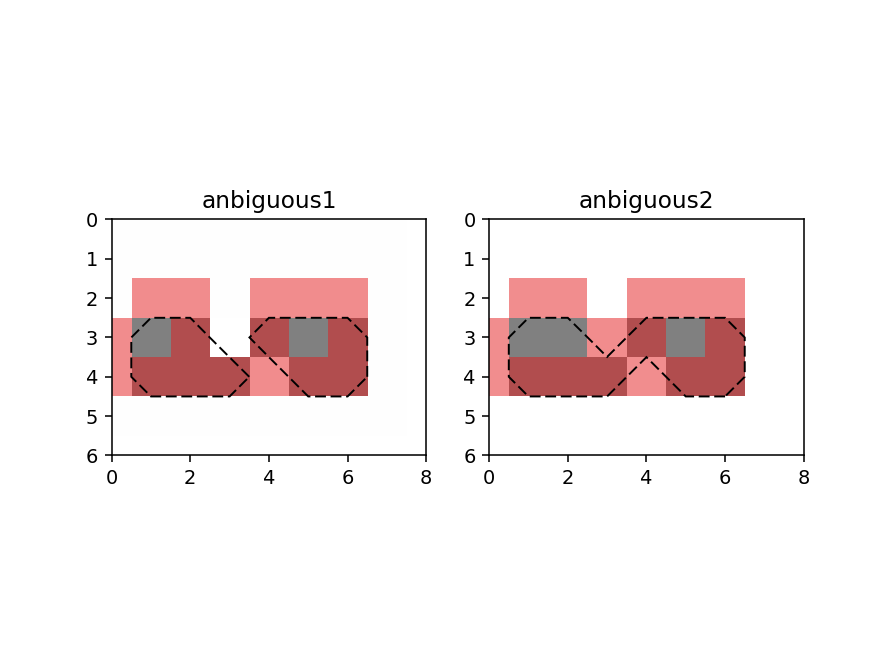

In [51]:
image1 = numpy.zeros((6, 8))
image1[(3, 4), :] = 1
image1[:, (0, -1)] = 0
image1[3, 3] = -0.01
image1[4, 4] = 0.0
mask = None

image2 = numpy.array(image1)
image2[3, 3] = +0.01

algo1 = MarchingSquaresMergeImpl(image1, mask)
algo2 = MarchingSquaresMergeImpl(image2, mask)

pyplot.figure()
pyplot.subplot("121")
pyplot.title("anbiguous1")
imshow_data(image1, mask, algo1, 0.50)
pyplot.subplot("122")
pyplot.title("anbiguous2")
imshow_data(image2, mask, algo2, 0.50)
pyplot.show()

<IPython.core.display.Javascript object>


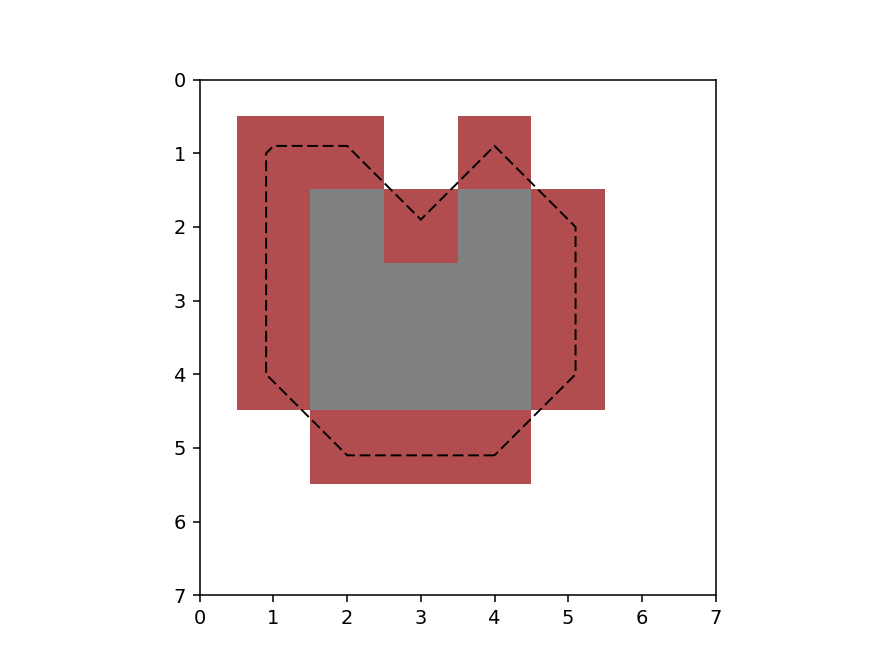

In [53]:
image = numpy.array([
                     [0, 0, 0, 0, 0, 0, 0],
                     [0, 1, 1, 0, 1, 0, 0],
                     [0, 1, 1, 1, 1, 1, 0],
                     [0, 1, 1, 1, 1, 1, 0],
                     [0, 1, 1, 1, 1, 1, 0],
                     [0, 0, 1, 1, 1, 0, 0],
                     [0, 0, 0, 0, 0, 0, 0],
                    ])
algo = MarchingSquaresMergeImpl(image)
show_data(image, None, algo, 0.9)

<IPython.core.display.Javascript object>


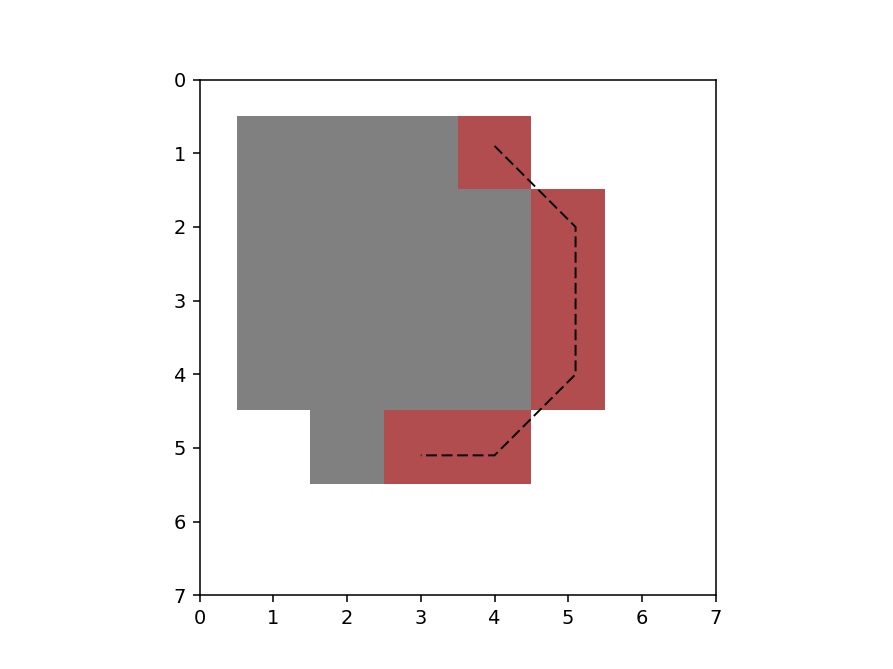

In [55]:
image = numpy.array([
                     [0, 0, 0, 0, 0, 0, 0],
                     [0, 1, 1, 1, 1, 0, 0],
                     [0, 1, 1, 1, 1, 1, 0],
                     [0, 1, 1, 1, 1, 1, 0],
                     [0, 1, 1, 1, 1, 1, 0],
                     [0, 0, 1, 1, 1, 0, 0],
                     [0, 0, 0, 0, 0, 0, 0],
                    ])
mask = numpy.array([
                     [1, 1, 1, 1, 0, 0, 0],
                     [1, 1, 1, 1, 0, 0, 0],
                     [1, 1, 1, 1, 0, 0, 0],
                     [1, 1, 1, 0, 0, 0, 0],
                     [1, 1, 1, 0, 0, 0, 0],
                     [1, 1, 1, 0, 0, 0, 0],
                     [1, 1, 1, 0, 0, 0, 0],
                    ])
algo = MarchingSquaresMergeImpl(image, mask)
show_data(image, None, algo, 0.9)

Silx
====

In [9]:
%gui qt

In [4]:
from silx.gui import qt
app = qt.QApplication([])

In [11]:
from silx.gui.plot import Plot2D
from silx.gui.plot.Colormap import Colormap


def createRgbaMaskImage(mask, color):
    image = numpy.empty((mask.shape[0], mask.shape[1], 4), dtype=numpy.uint8)
    transparent = numpy.array([0, 0, 0, 0])
    color = numpy.array(color)
    image[mask == True] = color
    image[mask == False] = transparent
    return image


def showData(image, mask, value):
    marching_square = MarchingSquareSciKitImage(image, mask)
    plot = Plot2D()

    plot.addImage(image, legend="image", colormap=Colormap("viridis"), replace=False)

    # mask
    if mask is not None:
        mask = createRgbaMaskImage(mask, color=numpy.array([255, 0, 255, 128]))
        plot.addImage(mask, legend="mask", replace=False)

    # iso pixels
    iso_pixels = marching_square.find_pixels(value)
    if len(iso_pixels) != 0:
        mask = numpy.zeros(image.shape, dtype=numpy.int8)
        indexes = iso_pixels[:,0] * image.shape[1] + iso_pixels[:,1]
        mask = mask.ravel()
        mask[indexes] = 1
        mask.shape = image.shape
        mask = createRgbaMaskImage(mask, color=numpy.array([255, 0, 0, 128]))
        plot.addImage(mask, legend="iso-pixels", replace=False)

    # iso contours
    polygons = marching_square.find_contours(value)
    for ipolygon, polygon in enumerate(polygons):
        if len(polygon) == 0:
            continue
        isClosed = numpy.allclose(polygon[0], polygon[-1])
        x = polygon[:, 1] + 0.5
        y = polygon[:, 0] + 0.5
        plot.addCurve(x=x, y=y, linestyle="--", color="black", legend="polygon-%d" % ipolygon)

    plot.show()
    return

In [12]:
image = numpy.array([
                     [0, 0, 0, 0, 0, 0, 0],
                     [0, 1, 1, 1, 1, 0, 0],
                     [0, 1, 1, 1, 1, 1, 0],
                     [0, 1, 1, 1, 1, 1, 0],
                     [0, 1, 1, 1, 1, 1, 0],
                     [0, 0, 1, 1, 1, 0, 0],
                     [0, 0, 0, 0, 0, 0, 0],
                    ])
mask = None
showData(image, mask, 0.9)

In [14]:
image = create_island((512, 512), summit=4808.72, under_water=1500)
algo = MarchingSquaresMergeImpl(image)
showData(image, None, 0.5)

/home/valls/.local/lib/python3.5/site-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


In [15]:
numpy.random.randint(1, 8)

3

Benchmark
=========

In [30]:
import sys
sys.version

'3.5.2 (default, Oct  3 2016, 15:17:52) \n[GCC 4.9.2]'

In [31]:
import numpy
import os
ROOT = os.getcwd()


class Problem(object):

    def __init__(self, image, mask=None, values=None, complexity=None):
        self._image = image
        self._mask = mask
        if values is None:
            values = image.min() + numpy.array(range(10)) * (image.max() - image.min())
            values = values / len(values)
            values = values[1:-1]
        self._values = values
        if complexity is None:
            complexity = image.shape[0] * image.shape[1]
        self._complexity = complexity

    @property
    def image(self):
        return self._image

    @property
    def mask(self):
        return self._mask

    @property
    def values(self):
        return self._values

    @property
    def complexity(self):
        return self._complexity

def create_id22_17_problem():
    # Problem containing an image of 4096x4096 with 17 rings
    data = numpy.load(ROOT + "/data/id22_17.npz")
    image = data["tth"]
    mask = (data["mask"] != 0)
    values = data["angles"]
    return Problem(image, mask, values, None)

def create_wos_problem():
    # Problem containing a WOS XPad with pixel displacment and mask
    import fabio
    data = numpy.load(ROOT + "/data/wos_tth.npz")
    image = data["tth"]
    mask = fabio.open(ROOT + "/data/wos_mask.edf").data
    mask = (mask != 0)
    values = data["angles"]
    return Problem(image, mask, values, None)

def create_id22_1441_problem():
    # Problem containing an image of 4096x4096 with 1441 rings
    data = numpy.load(ROOT + "/data/id22_1441.npz")
    image = data["tth"]
    mask = (data["mask"] != 0)
    values = data["angles"]
    return Problem(image, mask, values, None)

In [32]:
import silx._version
print(silx._version.version)
print(silx.__path__)

0.8.0-dev0
['/home/valls/.local/lib/python3.5/site-packages/silx']


In [43]:
from silx.image.marchingsquares import MarchingSquaresMergeImpl
from silx.image.marchingsquares._skimage import MarchingSquaresSciKitImage
try:
    from silx.image.marchingsquares._mergeimpl_no_omp import MarchingSquaresMergeImpl as _
    MarchingSquaresMergeImpl_NoOpenMp = _
except Exception as e:
    MarchingSquaresMergeImpl_NoOpenMp = None
    print(e)

<IPython.core.display.Javascript object>


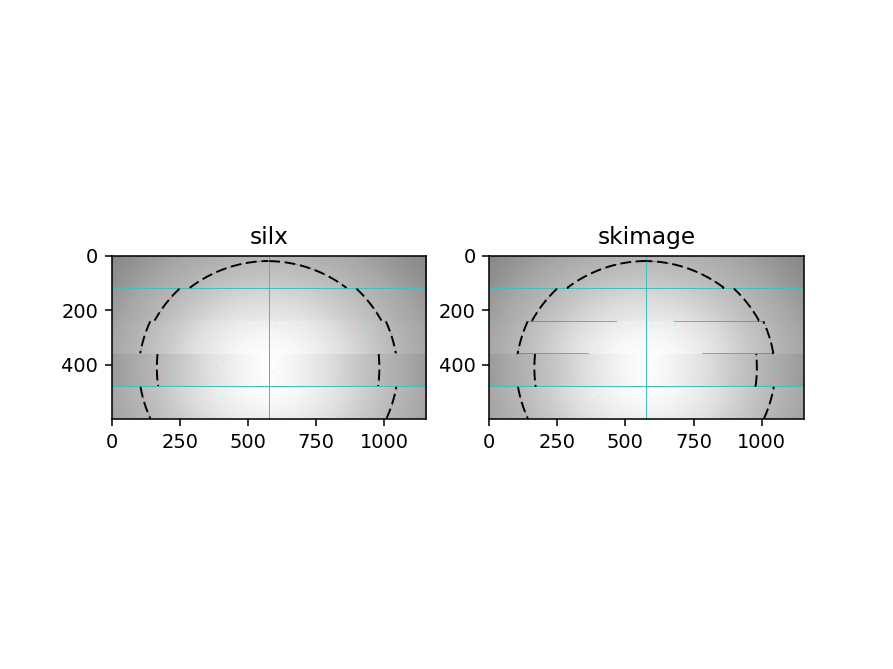

In [36]:
p = create_wos_problem()

algo = MarchingSquaresMergeImpl(p.image, p.mask)
skalgo = MarchingSquaresSciKitImage(p.image, p.mask)
value = p.values[len(p.values) // 2]

pyplot.figure()
pyplot.subplot("121")
pyplot.title("silx")
imshow_data(p.image, p.mask, algo, value)
pyplot.subplot("122")
pyplot.title("skimage")
imshow_data(p.image, p.mask, skalgo, value)
pyplot.show()

<IPython.core.display.Javascript object>


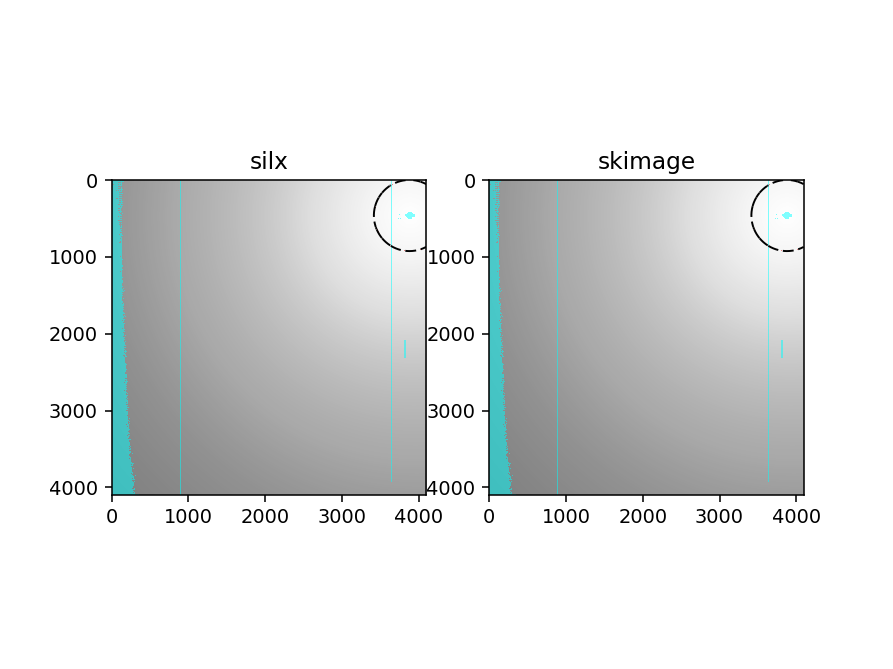

In [37]:
p = create_id22_17_problem()

algo = MarchingSquaresMergeImpl(p.image, p.mask)
skalgo = MarchingSquaresSciKitImage(p.image, p.mask)
value = p.values[len(p.values) // 2]

pyplot.figure()
pyplot.subplot("121")
pyplot.title("silx")
imshow_data(p.image, p.mask, algo, value)
pyplot.subplot("122")
pyplot.title("skimage")
imshow_data(p.image, p.mask, skalgo, value)
pyplot.show()

Benchmark find_pixels
============

In [45]:
import pyFAI.ext.marchingsquares

class MarchingSquaresPyFai(object):
    
    def __init__(self, image, mask=None):
        self._image = image
        self._mask = mask
    
    def find_pixels(self, level):
        """Implementation used in pyFAI"""
        points = pyFAI.ext.marchingsquares.isocontour(self._image, level).round().astype(int)
        if self._mask is not None:
            points = set((i[1], i[0]) for i in points if self._mask[i[1], i[0]])
        return points

In [6]:
p = create_id22_17_problem()
print("No mask")
print("-------")
print("skimage")
%timeit a = MarchingSquaresSciKitImage(p.image); [a.find_pixels(v) for v in p.values]
print("pyFAI")
%timeit a = MarchingSquaresPyFai(p.image); [a.find_pixels(v) for v in p.values]

if MarchingSquaresMergeImpl_NoOpenMp:
    print("silx")
    %timeit a = MarchingSquaresMergeImpl_NoOpenMp(p.image); [a.find_pixels(v) for v in p.values]
print("silx + openmp")
%timeit a = MarchingSquaresMergeImpl(p.image); [a.find_pixels(v) for v in p.values]

if MarchingSquaresMergeImpl_NoOpenMp:
    print("silx + minmax cache")
    %timeit a = MarchingSquaresMergeImpl_NoOpenMp(p.image, use_minmax_cache=True); [a.find_pixels(v) for v in p.values]
print("silx + minmax cache + openmp")
%timeit a = MarchingSquaresMergeImpl(p.image, use_minmax_cache=True); [a.find_pixels(v) for v in p.values]

No mask
-------
skimage
1.59 s ± 2.99 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
pyFAI
2 s ± 2.28 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
silx
1.1 s ± 2.91 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
silx + openmp
263 ms ± 2.33 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
silx + minmax cache
85.1 ms ± 306 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
silx + minmax cache + openmp
69.9 ms ± 1.6 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [7]:
p = create_wos_problem()
print("Mask")
print("-------")
print("skimage")
%timeit a = MarchingSquaresSciKitImage(p.image, p.mask); [a.find_pixels(v) for v in p.values]
print("pyFAI")
%timeit a = MarchingSquaresPyFai(p.image, p.mask); [a.find_pixels(v) for v in p.values]

if MarchingSquaresMergeImpl_NoOpenMp:
    print("silx")
    %timeit a = MarchingSquaresMergeImpl_NoOpenMp(p.image, p.mask); [a.find_pixels(v) for v in p.values]
print("silx + openmp")
%timeit a = MarchingSquaresMergeImpl(p.image, p.mask); [a.find_pixels(v) for v in p.values]

if MarchingSquaresMergeImpl_NoOpenMp:
    print("silx + minmax cache")
    %timeit a = MarchingSquaresMergeImpl_NoOpenMp(p.image, p.mask, use_minmax_cache=True); [a.find_pixels(v) for v in p.values]
print("silx + minmax cache + openmp")
%timeit a = MarchingSquaresMergeImpl(p.image, p.mask, use_minmax_cache=True); [a.find_pixels(v) for v in p.values]

Mask
-------
skimage
158 ms ± 33 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
pyFAI
128 ms ± 2.09 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
silx
34.2 ms ± 303 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
silx + openmp
15.3 ms ± 197 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
silx + minmax cache
17.3 ms ± 69.1 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
silx + minmax cache + openmp
9.8 ms ± 139 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [8]:
p = create_id22_1441_problem()
print("No mask")
print("-------")
print("skimage")
%timeit a = MarchingSquaresSciKitImage(p.image); [a.find_pixels(v) for v in p.values]
print("pyFAI")
%timeit a = MarchingSquaresPyFai(p.image); [a.find_pixels(v) for v in p.values]

if MarchingSquaresMergeImpl_NoOpenMp:
    print("silx")
    %timeit a = MarchingSquaresMergeImpl_NoOpenMp(p.image); [a.find_pixels(v) for v in p.values]
print("silx + openmp")
%timeit a = MarchingSquaresMergeImpl(p.image); [a.find_pixels(v) for v in p.values]

if MarchingSquaresMergeImpl_NoOpenMp:
    print("silx + minmax cache")
    %timeit a = MarchingSquaresMergeImpl_NoOpenMp(p.image, use_minmax_cache=True); [a.find_pixels(v) for v in p.values]
print("silx + minmax cache + openmp")
%timeit a = MarchingSquaresMergeImpl(p.image, use_minmax_cache=True); [a.find_pixels(v) for v in p.values]

No mask
-------
skimage
38.6 s ± 112 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
pyFAI
47.5 s ± 259 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
silx
24.8 s ± 90.3 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
silx + openmp
5.09 s ± 185 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
silx + minmax cache
2.22 s ± 29.8 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
silx + minmax cache + openmp
1.28 s ± 197 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [9]:
print("Without OpenMP: x%f" % (48.1 / 7.84))
print("With OpenMP: x%f" % (48.1 / 1.28))

Without OpenMP: x6.135204
With OpenMP: x37.578125


Benchmark find_contours
=======================

In [10]:
try:
    import matplotlib._cntr
    class MarchingSquaresMatplotlib(object):

        def __init__(self, image, mask=None):
            import matplotlib._cntr
            self._image = image
            self._mask = mask
            x, y = numpy.mgrid[:self._image.shape[0], :self._image.shape[1]]
            self._contour = matplotlib._cntr.Cntr(x, y, self._image)

        _deltas = [(0.0, 0.0), (0.99, 0.0), (0.0, 0.99), (0.99, 0.99)]

        def _flag_coord_over_mask(self, coord):
            """Flag coord over the mask as NaN"""
            for dx, dy in self._deltas:
                if self._mask[int(coord[0] + dx), int(coord[1] + dy)] != 0:
                    return float("nan"), float("nan")
            return coord

        def find_contours(self, value):
            res = self._contour.trace(value)
            nseg = len(res) // 2
            polylines, _codes = res[:nseg], res[nseg:]

            result = []
            for polyline in polylines:
                if self._mask is not None:
                    polyline = map(self._flag_coord_over_mask, polyline)
                    polyline = list(polyline)
                    polyline = numpy.array(polyline)
                result.append(polyline)
            return result
except Exception as e:
    print(e)
    MarchingSquaresMatplotlib = None

In [11]:
p = create_id22_17_problem()
print("No mask")
print("-------")
print("skimage")
%timeit a = MarchingSquaresSciKitImage(p.image); [a.find_contours(v) for v in p.values]
if MarchingSquaresMatplotlib:
    print("matplotlib")
    %timeit a = MarchingSquaresMatplotlib(p.image); [a.find_contours(v) for v in p.values]

if MarchingSquaresMergeImpl_NoOpenMp:
    print("silx")
    %timeit a = MarchingSquaresMergeImpl_NoOpenMp(p.image); [a.find_contours(v) for v in p.values]
print("silx + openmp")
%timeit a = MarchingSquaresMergeImpl(p.image); [a.find_contours(v) for v in p.values]

if MarchingSquaresMergeImpl_NoOpenMp:
    print("silx + minmax cache")
    %timeit a = MarchingSquaresMergeImpl_NoOpenMp(p.image, use_minmax_cache=True); [a.find_contours(v) for v in p.values]
print("silx + minmax cache + openmp")
%timeit a = MarchingSquaresMergeImpl(p.image, use_minmax_cache=True); [a.find_contours(v) for v in p.values]

No mask
-------
skimage
1.6 s ± 10.5 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
matplotlib
1.79 s ± 10.9 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
silx
1.11 s ± 7.49 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
silx + openmp
260 ms ± 4.73 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
silx + minmax cache
85.8 ms ± 2.6 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
silx + minmax cache + openmp
72.1 ms ± 5.56 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [9]:
# print("Without OpenMP: x%f" % (1.82 / xxx))
print("With OpenMP: x%f" % (1.82 / 0.0729))

With OpenMP: x24.965706


In [12]:
p = create_wos_problem()
print("Mask")
print("-------")
print("skimage")
%timeit a = MarchingSquaresSciKitImage(p.image, p.mask); [a.find_contours(v) for v in p.values]
if MarchingSquaresMatplotlib:
    print("matplotlib")
    %timeit a = MarchingSquaresMatplotlib(p.image, p.mask); [a.find_contours(v) for v in p.values]

if MarchingSquaresMergeImpl_NoOpenMp:
    print("silx")
    %timeit a = MarchingSquaresMergeImpl_NoOpenMp(p.image, p.mask); [a.find_contours(v) for v in p.values]
print("silx + openmp")
%timeit a = MarchingSquaresMergeImpl(p.image, p.mask); [a.find_contours(v) for v in p.values]

if MarchingSquaresMergeImpl_NoOpenMp:
    print("silx + minmax cache")
    %timeit a = MarchingSquaresMergeImpl_NoOpenMp(p.image, p.mask, use_minmax_cache=True); [a.find_contours(v) for v in p.values]
print("silx + minmax cache + openmp")
%timeit a = MarchingSquaresMergeImpl(p.image, p.mask, use_minmax_cache=True); [a.find_contours(v) for v in p.values]

Mask
-------
skimage
468 ms ± 11.7 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
matplotlib
371 ms ± 2.33 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
silx
33 ms ± 207 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
silx + openmp
13.8 ms ± 583 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
silx + minmax cache
16.8 ms ± 61.9 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
silx + minmax cache + openmp
8 ms ± 9.78 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [12]:
# print("Without OpenMP: x%f" % (373 / xxx))
print("With OpenMP: x%f" % (373 / 12.9))

With OpenMP: x28.914729


In [13]:
p = create_id22_1441_problem()
print("No mask")
print("-------")
print("skimage")
%timeit a = MarchingSquaresSciKitImage(p.image); [a.find_contours(v) for v in p.values]
if MarchingSquaresMatplotlib:
    print("matplotlib")
    %timeit a = MarchingSquaresMatplotlib(p.image); [a.find_contours(v) for v in p.values]

if MarchingSquaresMergeImpl_NoOpenMp:
    print("silx")
    %timeit a = MarchingSquaresMergeImpl_NoOpenMp(p.image); [a.find_contours(v) for v in p.values]
print("silx + openmp")
%timeit a = MarchingSquaresMergeImpl(p.image); [a.find_contours(v) for v in p.values]

if MarchingSquaresMergeImpl_NoOpenMp:
    print("silx + minmax cache")
    %timeit a = MarchingSquaresMergeImpl_NoOpenMp(p.image, use_minmax_cache=True); [a.find_contours(v) for v in p.values]
print("silx + minmax cache + openmp")
%timeit a = MarchingSquaresMergeImpl(p.image, use_minmax_cache=True); [a.find_contours(v) for v in p.values]

No mask
-------
skimage
38.5 s ± 177 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
matplotlib
34.3 s ± 94.8 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
silx
24.6 s ± 81.7 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
silx + openmp
4.66 s ± 37.4 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
silx + minmax cache
2.05 s ± 7.39 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
silx + minmax cache + openmp
733 ms ± 11.6 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [15]:
# print("With OpenMP: x%f" % (35.2 / xxx))
print("Without OpenMP: x%f" % (35.2 / 0.812))

Without OpenMP: x43.349754


Benchmark find_pixels using find_contours
========================================

Compute `find_pixels` using `find_contours`.

In [39]:
def merge_pixels(polylines):
    delta = numpy.array([0.5, 0.5])
    size = 0
    for polyline in polylines:
        size += len(polyline)
    result = numpy.empty((size, 2), dtype=numpy.int32)
    if size == 0:
        return result
    size = 0
    for polyline in polylines:
        if len(polyline) == 0:
            continue
        integer_polyline = numpy.floor(polyline + delta)
        result[size:size + len(polyline)] = integer_polyline
        size += len(polyline)
    result = numpy.unique(result, axis=0)
    return result

class Adapter(object):
    """Implement find_pixels using find_contours."""
    
    def __init__(self, marching_squares_impl):
        self._impl = marching_squares_impl
    
    def find_contours(self, level):
        return self._impl.find_contours(level)

    def find_pixels(self, level):
        polygons = self._impl.find_contours(level)
        return merge_pixels(polygons)

In [56]:
p = create_wos_problem()
print("Mask")
print("-------")
print("skimage")
%timeit a = Adapter(MarchingSquaresSciKitImage(p.image, p.mask)); [a.find_pixels(v) for v in p.values]

if MarchingSquaresMergeImpl_NoOpenMp:
    print("silx")
    %timeit a = Adapter(MarchingSquaresMergeImpl_NoOpenMp(p.image, p.mask)); [a.find_pixels(v) for v in p.values]
print("silx + openmp")
%timeit a = Adapter(MarchingSquaresMergeImpl(p.image, p.mask)); [a.find_pixels(v) for v in p.values]

if MarchingSquaresMergeImpl_NoOpenMp:
    print("silx + minmax cache")
    %timeit a = Adapter(MarchingSquaresMergeImpl_NoOpenMp(p.image, p.mask, use_minmax_cache=True)); [a.find_pixels(v) for v in p.values]
print("silx + minmax cache + openmp")
%timeit a = Adapter(MarchingSquaresMergeImpl(p.image, p.mask, use_minmax_cache=True)); [a.find_pixels(v) for v in p.values]

Mask
-------
skimage
491 ms ± 12.5 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
silx
37.5 ms ± 31.8 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
silx + openmp
21.6 ms ± 140 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
silx + minmax cache
21.6 ms ± 426 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
silx + minmax cache + openmp
16.6 ms ± 632 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [48]:
p = create_id22_1441_problem()
print("No mask")
print("-------")
print("skimage")
%timeit a = Adapter(MarchingSquaresSciKitImage(p.image)); [a.find_pixels(v) for v in p.values]

if MarchingSquaresMergeImpl_NoOpenMp:
    print("silx")
    %timeit a = Adapter(MarchingSquaresMergeImpl_NoOpenMp(p.image)); [a.find_pixels(v) for v in p.values]
print("silx + openmp")
%timeit a = Adapter(MarchingSquaresMergeImpl(p.image)); [a.find_pixels(v) for v in p.values]

if MarchingSquaresMergeImpl_NoOpenMp:
    print("silx + minmax cache")
    %timeit a = Adapter(MarchingSquaresMergeImpl_NoOpenMp(p.image, use_minmax_cache=True)); [a.find_pixels(v) for v in p.values]
print("silx + minmax cache + openmp")
%timeit a = Adapter(MarchingSquaresMergeImpl(p.image, use_minmax_cache=True)); [a.find_pixels(v) for v in p.values]

No mask
-------
skimage
39.2 s ± 356 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
silx
25.2 s ± 146 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
silx + openmp
5.69 s ± 854 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
silx + minmax cache
2.69 s ± 53.5 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
silx + minmax cache + openmp
1.69 s ± 141 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


Mask
====

In [14]:
p = create_wos_problem()
print("Mask")
print("-------")
print("skimage")
%timeit a = MarchingSquaresSciKitImage(p.image, p.mask); [a.find_contours(v) for v in p.values]
if MarchingSquaresMatplotlib:
    print("matplotlib")
    %timeit a = MarchingSquaresMatplotlib(p.image, p.mask); [a.find_contours(v) for v in p.values]

if MarchingSquaresMergeImpl_NoOpenMp:
    print("silx")
    %timeit a = MarchingSquaresMergeImpl_NoOpenMp(p.image, p.mask); [a.find_contours(v) for v in p.values]
print("silx + openmp")
%timeit a = MarchingSquaresMergeImpl(p.image, p.mask); [a.find_contours(v) for v in p.values]

if MarchingSquaresMergeImpl_NoOpenMp:
    print("silx + minmax cache")
    %timeit a = MarchingSquaresMergeImpl_NoOpenMp(p.image, p.mask, use_minmax_cache=True); [a.find_contours(v) for v in p.values]
print("silx + minmax cache + openmp")
%timeit a = MarchingSquaresMergeImpl(p.image, p.mask, use_minmax_cache=True); [a.find_contours(v) for v in p.values]

Mask
-------
skimage
463 ms ± 14.1 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
matplotlib
365 ms ± 7.12 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
silx
33.5 ms ± 587 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
silx + openmp
14.7 ms ± 1.05 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
silx + minmax cache
16.9 ms ± 119 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
silx + minmax cache + openmp
8.36 ms ± 233 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [15]:
p = create_wos_problem()
print("No mask")
print("-------")
print("skimage")
%timeit a = MarchingSquaresSciKitImage(p.image); [a.find_contours(v) for v in p.values]
if MarchingSquaresMatplotlib:
    print("matplotlib")
    %timeit a = MarchingSquaresMatplotlib(p.image); [a.find_contours(v) for v in p.values]

if MarchingSquaresMergeImpl_NoOpenMp:
    print("silx")
    %timeit a = MarchingSquaresMergeImpl_NoOpenMp(p.image); [a.find_contours(v) for v in p.values]
print("silx + openmp")
%timeit a = MarchingSquaresMergeImpl(p.image); [a.find_contours(v) for v in p.values]

if MarchingSquaresMergeImpl_NoOpenMp:
    print("silx + minmax cache")
    %timeit a = MarchingSquaresMergeImpl_NoOpenMp(p.image, use_minmax_cache=True); [a.find_contours(v) for v in p.values]
print("silx + minmax cache + openmp")
%timeit a = MarchingSquaresMergeImpl(p.image, use_minmax_cache=True); [a.find_contours(v) for v in p.values]

No mask
-------
skimage
133 ms ± 836 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
matplotlib
40.6 ms ± 407 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
silx
38 ms ± 359 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
silx + openmp
24.6 ms ± 1.05 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
silx + minmax cache
35.4 ms ± 459 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
silx + minmax cache + openmp
22.5 ms ± 1.18 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
